<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/Cap_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 6: Implementação de Filtros Digitais no Tempo

## Resumo  
Os filtros digitais desempenham um papel essencial no processamento de sinais e podem ser divididos em duas categorias principais:  
- **Filtros de Resposta ao Impulso Finita (FIR)**: apresentam uma resposta ao impulso com duração limitada. São inerentemente estáveis e podem ser projetados para ter uma resposta de fase linear, o que é crucial em aplicações como processamento de áudio e comunicação.  
- **Filtros de Resposta ao Impulso Infinita (IIR)**: possuem resposta ao impulso de duração infinita devido ao uso de realimentação. Eles podem alcançar a mesma resposta de frequência que os filtros FIR, porém utilizando menos coeficientes. No entanto, podem apresentar instabilidades e distorções de fase.  

Neste capítulo, exploramos diferentes estruturas utilizadas na implementação de filtros digitais, abordando os métodos para filtros FIR e IIR, além de discutir como a quantização pode afetar a precisão dos cálculos.  

---

## 1. Estruturas de Implementação de Filtros  
Existem várias formas de implementar filtros digitais, cada uma com características específicas que impactam o desempenho e a estabilidade do sistema.  

### Estruturas para Filtros IIR:  
1. **Forma Direta I**: Utiliza diretamente os coeficientes do numerador e do denominador na equação das diferenças.  
2. **Forma Direta II**: Apresenta uma estrutura mais eficiente, reduzindo a necessidade de armazenamento ao reorganizar os cálculos em seções de segunda ordem.  
3. **Estruturas em Cascata**: Dividem a função de transferência em seções menores para minimizar erros numéricos e melhorar a estabilidade do filtro.  
4. **Estruturas em Paralelo**: Representam a função de transferência como uma soma de termos mais simples, o que pode facilitar a implementação e análise.  

### Estruturas para Filtros FIR:  
1. **Convolução Direta**: Implementa a equação de convolução de maneira direta, sendo uma abordagem simples e eficiente para aplicações em software.  
2. **Estruturas Lattice**: Proporcionam uma implementação otimizada, reduzindo os efeitos da quantização e melhorando a estabilidade numérica.  

---

### Implementação em Python:

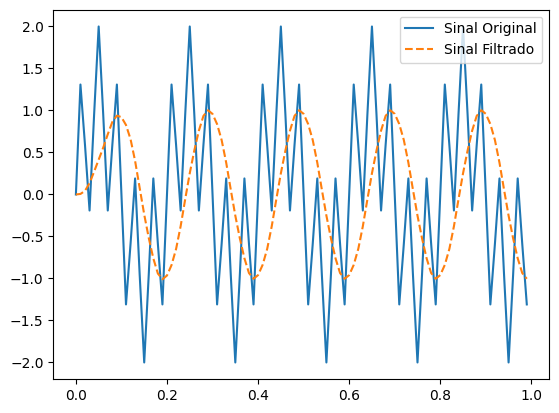

In [ ]:
from scipy.signal import lfilter, butter
import numpy as np
import matplotlib.pyplot as plt

# Definição de um filtro passa-baixa Butterworth
b, a = butter(4, 0.2)  # Ordem 4, frequência de corte normalizada 0.2

# Geração de um sinal de entrada
n = np.linspace(0, 1, 100, endpoint=False)
sinal = np.sin(2 * np.pi * 5 * n) + np.sin(2 * np.pi * 25 * n)

# Aplicação do filtro
sinal_filtrado = lfilter(b, a, sinal)

# Plotando o resultado
plt.plot(n, sinal, label='Sinal Original')
plt.plot(n, sinal_filtrado, label='Sinal Filtrado', linestyle='dashed')
plt.legend()
plt.show()

## 2. Impacto da Quantização e Precisão Limitada

Na implementação prática de filtros digitais, a precisão finita dos números pode introduzir efeitos indesejáveis. Os principais impactos incluem:

- **Ruído de Quantização**: Pequenos erros surgem ao representar coeficientes com precisão limitada, resultando em variações na resposta do filtro.
- **Acúmulo de Erros de Arredondamento**: Nos filtros IIR, sucessivos erros de arredondamento podem se propagar, afetando a estabilidade do sistema.
- **Oscilações Espúrias (Ciclos Limites)**: Em determinadas condições, filtros IIR podem gerar oscilações persistentes mesmo sem entrada, devido à quantização dos cálculos internos.


---

### Implementação em Python:

In [ ]:
# Simulação de quantização em coeficientes de filtro
b, a = butter(4, 0.2)
b_quant = np.round(b * 2**10) / 2**10  # Quantização para 10 bits

# Comparação do erro de coeficientes
print("Coeficientes originais:", b)
print("Coeficientes quantizados:", b_quant)

Coeficientes originais: [0.00482434 0.01929737 0.02894606 0.01929737 0.00482434]
Coeficientes quantizados: [0.00488281 0.01953125 0.02929688 0.01953125 0.00488281]


## 3. Implementação de Filtros FIR e IIR

A escolha da implementação de filtros FIR e IIR depende dos requisitos de estabilidade e comportamento da resposta de fase.

### Implementação de um Filtro FIR com a Janela de Hamming:
O método de janelas é amplamente utilizado no projeto de filtros FIR. Nele, a resposta ideal do filtro é truncada e suavizada por uma função janela, reduzindo efeitos indesejáveis como oscilações no espectro de frequência.


---

### Implementação em Python:

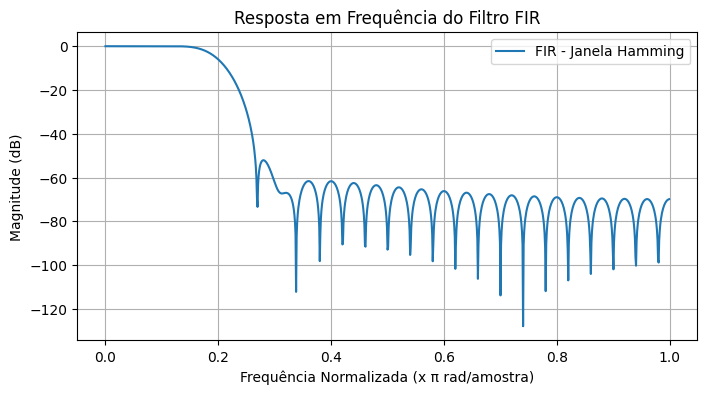

In [ ]:
from scipy.signal import firwin,freqz

# Definição de um filtro FIR passa-baixa
num_taps = 51  # Número de coeficientes
cutoff = 0.2  # Frequência de corte normalizada
b_fir = firwin(num_taps, cutoff, window='hamming')

# Aplicação do filtro FIR
sinal_filtrado_fir = lfilter(b_fir, [1.0], sinal)

# Resposta em frequência do filtro FIR
w, h = freqz(b_fir, worN=1024)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='FIR - Janela Hamming')
plt.title('Resposta em Frequência do Filtro FIR')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

### Implementação de um Filtro IIR de Butterworth:

Os filtros IIR são derivados de protótipos analógicos e convertidos para sua versão digital por meio de técnicas como a transformação bilinear. Essa abordagem garante que o filtro mantenha características desejáveis, como uma resposta de frequência suave e sem oscilações na banda passante.


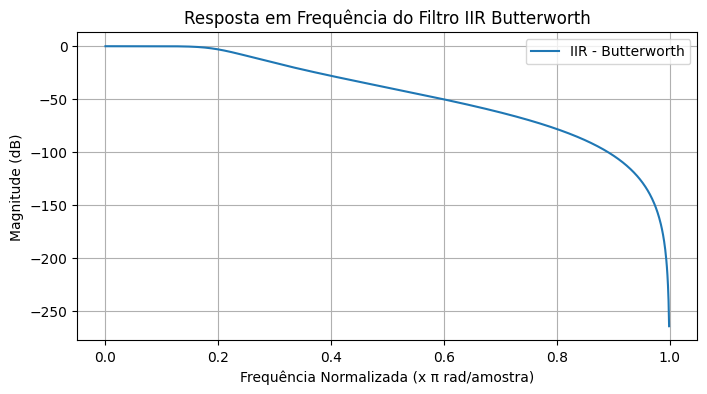

In [ ]:
# Definição do filtro IIR Butterworth
b_iir, a_iir = butter(4, 0.2)

# Aplicação do filtro IIR
sinal_filtrado_iir = lfilter(b_iir, a_iir, sinal)

# Resposta em frequência do filtro IIR
w, h = freqz(b_iir, a_iir, worN=1024)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(np.abs(h)), label='IIR - Butterworth')
plt.title('Resposta em Frequência do Filtro IIR Butterworth')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

## 4. Comparação entre Filtros FIR e IIR

| Característica          | FIR                          | IIR                          |
|------------------------|----------------------------|-----------------------------|
| **Estabilidade**       | Sempre estável             | Pode apresentar instabilidades |
| **Resposta de Fase**   | Linear em algumas situações | Geralmente não linear       |
| **Complexidade Computacional** | Elevada para ordens altas | Menor, exige menos coeficientes |
| **Implementação em Hardware**  | Mais eficiente para FPGA/DSP | Pode ser menos otimizado em algumas arquiteturas |

Filtros FIR são mais indicados para aplicações que exigem resposta de fase linear, como processamento de áudio e comunicações digitais. Já os filtros IIR são escolhidos quando a prioridade é reduzir o custo computacional, sendo amplamente utilizados em controle digital e filtragem adaptativa.

---

## Conclusão

Os filtros digitais são ferramentas essenciais no processamento de sinais, permitindo a remoção de ruídos e a extração de informações relevantes. A escolha entre FIR e IIR depende de fatores como a estabilidade do sistema, a exigência de resposta de fase linear e os recursos computacionais disponíveis. Além disso, a quantização deve ser considerada para evitar efeitos indesejados e garantir um desempenho confiável na implementação prática.


